In [128]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [129]:
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


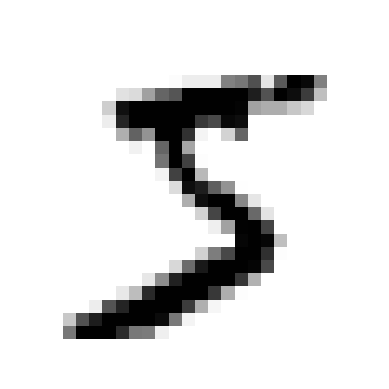

In [130]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [131]:
y[0]

'5'

In [132]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [133]:
# First try to classify 5s
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [134]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 0)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=0)

In [135]:
# evaluate it with 3-fold cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9499, 0.9556, 0.966 ])

In [136]:
# try a confusion matrix..
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[52931,  1648],
       [  922,  4499]])

In [138]:
# Precision: True positives / (True positives + False positives)
# Recall: True positives / (True positives + False negatives)
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) # 4499 / (4499 + 1648)
print(recall_score(y_train_5, y_train_pred)) # 4499 / (4499 + 922)

0.7319017406865137
0.8299206788415422


In [139]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.77783540802213

In [140]:
# try a different threshold
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [141]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

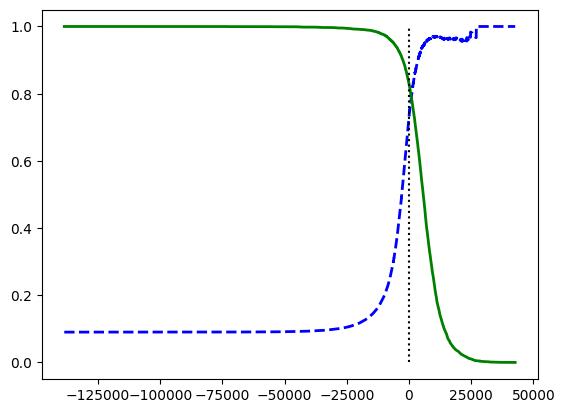

In [142]:
threshold=0
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

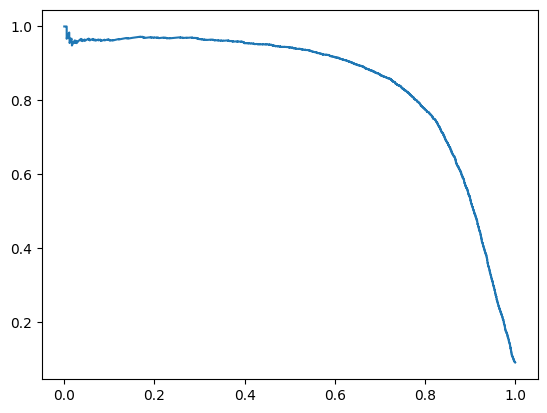

In [143]:
plt.plot(recalls, precisions)
plt.show()

In [144]:
# find the lowest threshold that gives 90% precision 
idx_for_90_precision = (precisions >= 0.90).argmax()
thresholds[idx_for_90_precision]

3611.731693631048

In [145]:
y_train_pred_90 = (y_scores >= 3612)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000517866390472
0.6412101088360082


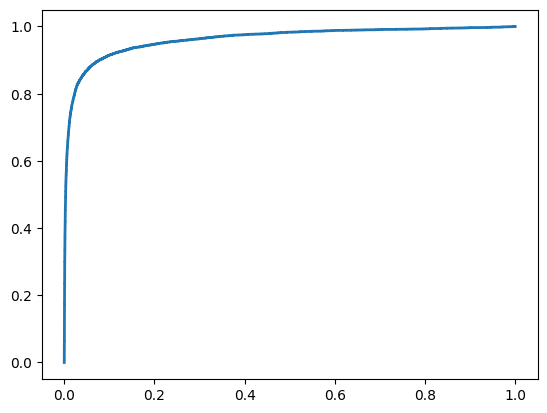

In [146]:
# roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.show()

In [147]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9624892334207759

In [148]:
# compare our sgdclassifier to randomforest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=0)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [149]:
y_probas_forest[:2]

array([[0.18, 0.82],
       [0.99, 0.01]])

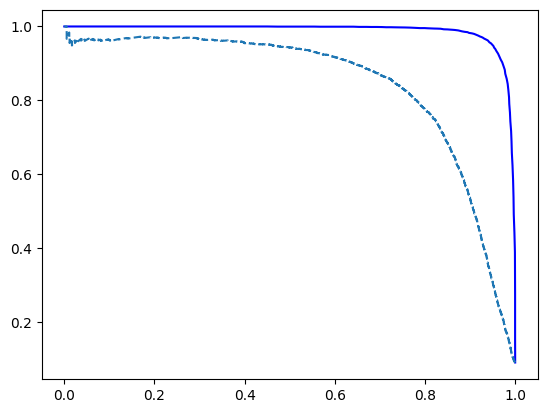

In [150]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.plot(recalls_forest, precisions_forest, "b-", label="Random Forest")
plt.plot(recalls, precisions, "--", label="SGD")
plt.show()

In [151]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 # predict 5 if probab >= 50%
print(f1_score(y_train_5, y_train_pred_forest))
print(roc_auc_score(y_train_5, y_scores_forest))

0.9278996865203762
0.9983139390673001


In [152]:
# multiclassifiers
from sklearn.svm import SVC
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=0)

In [153]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [154]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [155]:
some_digit_scores.argmax()

5

In [157]:
# scale inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

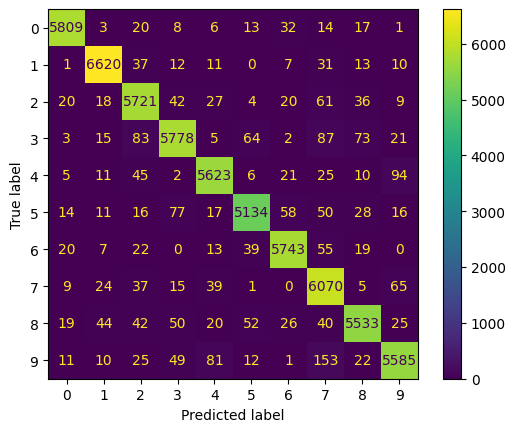

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()